In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pytz 
from scipy.optimize import minimize 
import generate_data
import economic_analysis
import optimization
from importlib import reload 
import pandas as pd
import json
from dataclasses import dataclass

## Generate Data

### Simulate charging load and insolation profiles

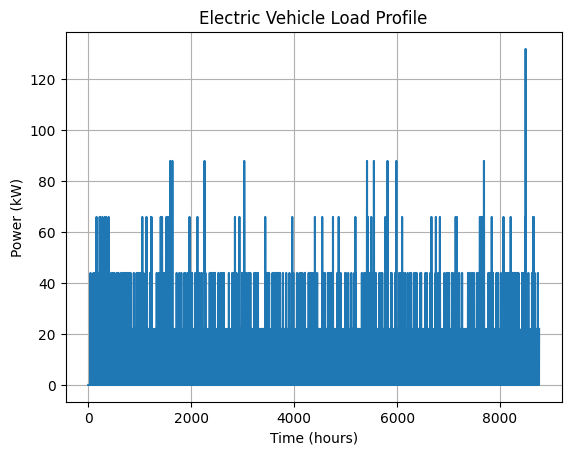

In [22]:
reload(generate_data)
total_days = 365  # Total number of days to simulate
total_time = 24 * total_days  # Total simulation time in hours
time_resolution = 1  # Time resolution in hours (e.g., 0.25 means 15 minutes)
num_vehicles = 4  # Number of EVs in the simulation
charging_power = 22  # Charging power in kW (e.g., Level 2 charging)
load_profile_simulated = generate_data.simulate_charging_load_profile(total_days, total_time,time_resolution, num_vehicles, charging_power)

In [65]:
import random

def simulate_charging_load(num_evs, charging_power, total_time, time_resolution, battery_capacity):
    num_days = total_time // (24 * 3600)  # Number of days in the simulation
    num_steps = total_time // time_resolution
    charging_load = []
    daily_charge = [[0] * num_steps for _ in range(num_evs)]  # Track daily charge for each EV
    
    for day in range(num_days):
        for step in range(num_steps):
            time = (day * 24 * 3600) + (step * time_resolution)  # Calculate time in seconds
            
            is_night = is_night_time(time)
            
            if is_night:
                active_evs = random.randint(0, num_evs)  # Number of EVs actively charging at this time step
                load = 0

                for _ in range(active_evs):
                    ev_id = random.randint(0, num_evs - 1)  # Select a random EV
                    remaining_capacity = battery_capacity - sum(daily_charge[ev_id])  # Calculate remaining capacity for the day
                    ev_load = min(charging_power, remaining_capacity)  # Charge up to remaining capacity

                    load += ev_load
                    daily_charge[ev_id][step] += ev_load

            else:
                active_evs = 0
                load = 0

            charging_load.append(load)

    return charging_load

def is_night_time(time):
    # Check if the time falls within the night time range
    # Here, night time is defined as 10 PM to 6 AM
    hour = (time // 3600) % 24
    return hour >= 22 or hour < 6


In [66]:
num_evs = 10
charging_power = 7.2  # Kilowatts
total_time = 24 * 3600 * 365  # 24 hours
time_resolution = 3600  # 1 hour
battery_capacity = 50  # Kilowatt-hours

charging_load = simulate_charging_load(num_evs, charging_power, total_time, time_resolution, battery_capacity)
plt.plot(charging_load)


KeyboardInterrupt: 

In [ ]:
# Generate equivalent ICE vehicle cost based on kWh utilization
vehicle_kWh_km = 0.2 # kWh/km
vehicle_km_per_year = load_profile_simulated.sum() * vehicle_kWh_km
fuel_cost = 1.5 # $/L
fuel_economy = 6.0 # L/100km
ICE_fuel_cost_per_year = fuel_cost * fuel_economy * vehicle_km_per_year / 100 



17016.516

In [75]:

class Vehicle:
    kgCO2_per_liter_gasoline = 2.3 # kgCO2/L
    
    def __init__(self, type: str):
        
        # TODO: Change these to user input or data load from file
        self.type = type
        self.daily_mileage = 20 # km/day
        self.days_worked_per_week = 5 # days/week
        self.weeks_worked_per_year = 50 # weeks/year
        self.fuel_economy = 6.0 # L/100km
        
        self.annual_maintenance_cost = 1000 # $/year
        self.insurance_cost = 500 # $/year
        
    def __repr__(self):
        return f"ICE(id = {repr(self.id)}, daily_mileage = {repr(self.daily_mileage)}, days_worked_per_week = {repr(self.days_worked_per_week)}, weeks_worked_per_year = {repr(self.weeks_worked_per_year)}, fuel_economy = {repr(self.fuel_economy)}, annual_maintenance_cost = {repr(self.annual_maintenance_cost)})"        
      
    def calculate_annual_mileage(self):
        return self.daily_mileage * self.days_worked_per_week * self.weeks_worked_per_year
    
    def calculate_annual_fuel_consumption(self):
        return self.calculate_annual_mileage() * self.fuel_economy / 100 
    
    def calculate_annual_carbon_emissions(self):
        return self.calculate_annual_fuel_consumption() * Vehicle.kgCO2_per_liter_gasoline
    

  #  def calculate_lifetime_costs(self):
        
        
    # calculate lifetime costs
    
    # plot lifetime costs


class EV(Vehicle):
    kgco2_per_kwh = 0.95 # kgCO2/kWh
    

    def __init__(self, id, charging_port, market_environment, financing_mechanism):
        super().__init__(id)
        self.efficiency = 0.20 # kWh/km
        self.battery_capacity = 30 # kWh
        #self.charging_power = 7.2 # kW
        self.charging_profile = self.get_charging_profile()
        
        # data classes
        self.charging = charging_port
        self.market_environment = market_environment
        self.financing_mechanism = financing_mechanism
        
    def __repr__(self):
        return f"EV(id={repr(self.id)}, battery_capacity={repr(self.battery_capacity)}, charging_power={repr(self.charging_power)})"
    
    # Simulate a charging profile based on the vehicle's daily mileage, battery capacity, and charging power
    def get_charging_profile(self):
        total_time = 24 * 3600 * 365  # 24 hours
        time_resolution = 3600  # 1 hour
        
        return simulate_charging_load(1, self.charging_power, total_time, time_resolution, self.battery_capacity)
    
    # TODO: Write this function 
    def calculate_annual_electricity_costs(self):
        economic_analysis.get_cost_of_charging(self.charging_profile)
        

    def calculate_annual_carbon_emissions(self):
        kWh_used = sum(self.charging_profile)
        return kWh_used * EV.kgco2_per_kwh
    
    
    def calculate_capital_financing_costs(self):
    

@dataclass
class ChargingPort:
    charging_power: float
    charging_cost: float
    charging_efficiency: float
    capex: float 

@dataclass 
class MarketEnvironment:
    int_rate: float
    inflation_rate: float
    price_diesel: int
    time_of_use_tariffs: dict
    price_diesel_annual_growth_rate: float
    price_electricity_annual_growth_rate: float

@dataclass    
class FinancingMechanism:
    loan_lifetime: int
    installment_schedule: int
    timeline: int 
    

    
    
    # charging_power = 7.2 # kW
    # num_charging_ports = 4
    # charging_cost = 0.2 # $/kWh
    # charging_efficiency = 0.9 # 90% efficient
    # capex_per_charging_port = 10000 # $/port

        


        

In [80]:
x = FinancingMechanism
x.loan_lifetime = 5
x.loan_lifetime

5

#### Solar profile

/Users/Orie4416/Desktop/Feasibility Assessment/chullenv/lib/python3.9/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/Orie4416/Desktop/Feasibility Assessment/chullenv/lib/python3.9/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/Users/Orie4416/Desktop/Feasibility Assessment/chullenv/lib/python3.9/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


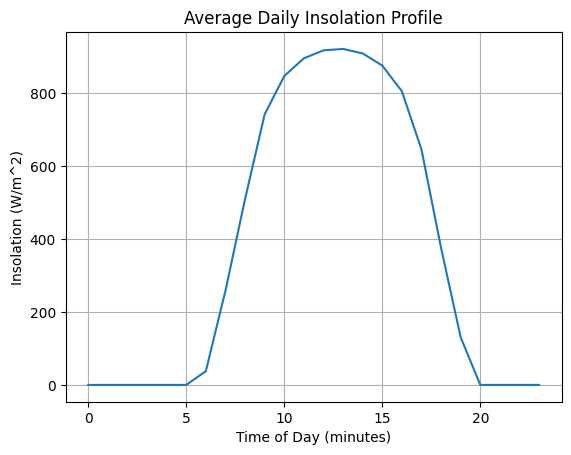

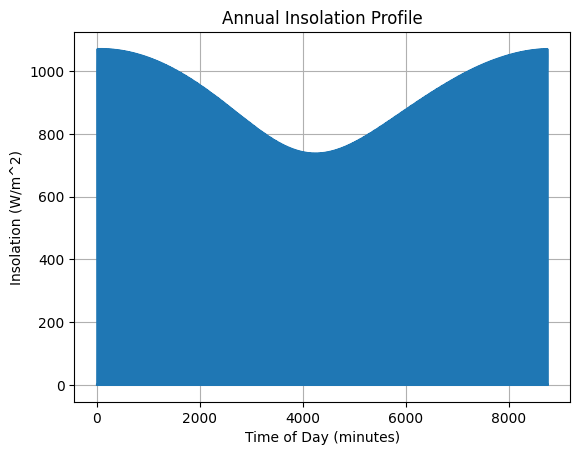

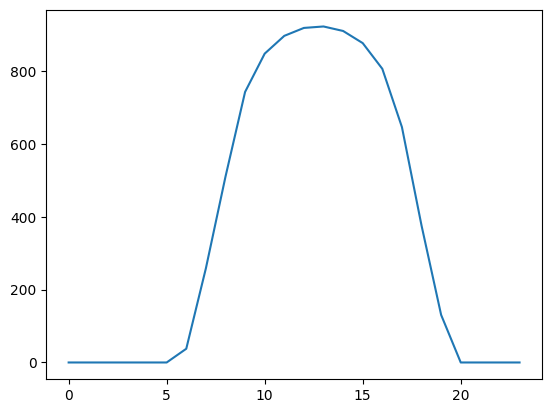

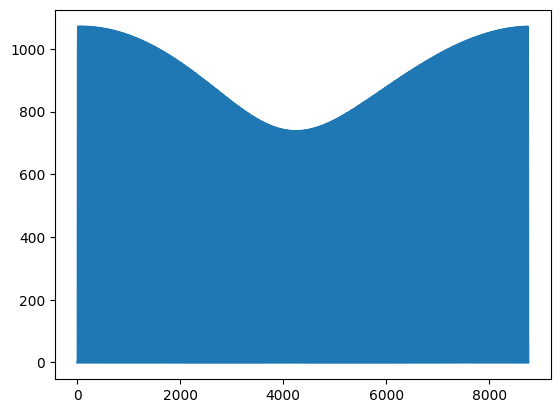

In [ ]:
# Location coordinates (latitude, longitude)
latitude = -33.9321  # Stellenbosch, SA
longitude = 18.8602

# Time resolution in minutes
time_resolution = 60

# Set the time zone
timezone = pytz.timezone('Africa/Cairo')  
daily_insolation_profile, annual_insolation_profile = generate_data.simulate_insolation_profile(latitude, longitude, time_resolution, timezone)
# # Save profiles 
pd.DataFrame(daily_insolation_profile).to_csv(f'solar_profiles/daily_insolation_profile_{time_resolution}_min_res.csv')
pd.DataFrame(annual_insolation_profile).to_csv(f'solar_profiles/annual_insolation_profile_{time_resolution}_min_res.csv')
daily_insolation_profile = pd.read_csv(f'solar_profiles/daily_insolation_profile_{time_resolution}_min_res.csv', index_col = 0)
annual_insolation_profile = pd.read_csv(f'solar_profiles/annual_insolation_profile_{time_resolution}_min_res.csv', index_col = 0)
# debug daily_insolation_profile = pd.read_csv(f'daily_insolation_profile_{time_resolution}_min_res.csv', index_col=0)
# debug annual_insolation_profile = pd.read_csv(f'annual_insolation_profile_{time_resolution}_min_res.csv', index_col=0)
daily_insolation_profile = daily_insolation_profile.values.flatten()
annual_insolation_profile = annual_insolation_profile.values.flatten()

plt.plot(daily_insolation_profile)
plt.show()
plt.plot(annual_insolation_profile)
plt.show()



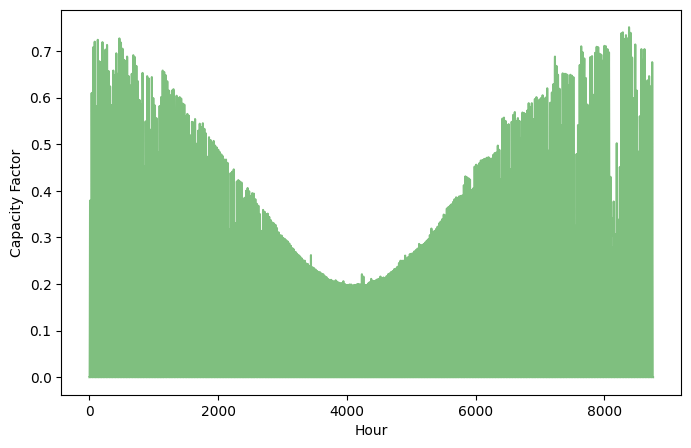

In [ ]:
# Read starting from line 4
annual_capacity_factor = pd.read_csv("solar_profiles/renewables_ninja_profile.csv", skiprows=3)
annual_capacity_factor = annual_capacity_factor['electricity'].values
plt.plot(annual_capacity_factor, color = 'green', alpha = 0.5)
plt.ylabel('Capacity Factor')
plt.xlabel('Hour')
# Make graph wider
plt.gcf().set_size_inches(8, 5)

plt.savefig('solar_profiles/renewables_ninja_profile.png')
plt.show()


### Define input parameters

In [ ]:

# Financial market inputs
i_no = 0.0775 # interest rate
f = 0.071 # inflation rate
Rproj = 20 # project lifetime (yrs)
discount_rate = 0.05 # discount rate

# Energy market inputs
feed_in_tariff = 0.041 # $/kWh
flat_energy_usage_cost = 0.20 # $/kWh (unused parameter when using ToD)

# Taxi market inputs
cost_per_passenger = 0.5 # $/passenger

# Define time periods (in 10-minute increments since midnight)
morning_start = 5  # 5am
afternoon_start = 11  # 11am
evening_start = 16  # 4pm
night_start = 21  # 9pm
time_periods = {'morning_start': morning_start,
                'afternoon_start': afternoon_start,
                'evening_start': evening_start,
                'night_start': night_start}

# Energy costs for different time periods (e.g., morning, afternoon, evening, night)
morning_cost = 0.15  # $/kWh
afternoon_cost = 0.20  # $/kWh
evening_cost = 0.18  # $/kWh
night_cost = 0.12  # $/kWh
time_of_use_tariffs = {'morning': morning_cost,
                       'afternoon': afternoon_cost,
                       'evening': evening_cost,
                       'night': night_cost}

# adjust all the values in time_of_use_tariffs by alpha (adjustment factor)
alpha = 1.5
time_of_use_tariffs = {k: v * alpha for k, v in time_of_use_tariffs.items()}

# Values of kWh in terms of passengers for different time periods 
time_passenger_per_kWh = {'morning': 0.25, 
                          'afternoon': 0.125,
                          'evening': 0.25, 
                          'night': 0.05}
# PV system specifications
pv_efficiency = 0.90  # 85% efficiency
pv_m_sq_per_kw = 6 
pv_cost_per_kw = 4000 # $/kW
pv_annual_maintenance_cost = 20 #$ 

# Inverter, mounting system, and installation costs
inverter_cost = 1000 # $
mounting_cost = 1000 # $
installation_cost = 1000 # $
additional_pv_capital_cost = inverter_cost + mounting_cost + installation_cost

# Environmental inputs
grid_carbon_intensity = 0.95 # kgCO2/kWh
carbon_price = 50/1000 # $/kgCo2


# Battery parameters
battery_cost_per_kWh = 400 # $/kWh
battery_charging_efficiency = 0.90
battery_discharging_efficiency = 0.90
battery_duration = 6 # hours 
 

# Station constraints
max_land_area = 300 # m^2

# System specifications
loadshedding_probability = 3776 / 8760


# a = {
#     'annual_insolation_profile': annual_insolation_profile,
#     'pv_efficiency': pv_efficiency,
#     'load_profile': load_profile,
#     'flat_energy_usage_cost': flat_energy_usage_cost,
#     'Rproj': Rproj,
#     'pv_cost_per_kw': pv_cost_per_kw,
#     'i_no': i_no,
#     'f': f,
#     'discount_rate': discount_rate,
#     'time_of_use_tariffs': time_of_use_tariffs,
#     'time_periods': time_periods,
#     'feed_in_tariff': feed_in_tariff,
#     'battery_cost_per_kWh': battery_cost_per_kWh,
#     'feed_in_tariff_bool': False,
#     'loadshedding_probability': loadshedding_probability,
#     'time_passenger_per_kWh': time_passenger_per_kWh,
#     'cost_per_passenger': cost_per_passenger,
#     'grid_carbon_intensity': grid_carbon_intensity,
#     'carbon_price': carbon_price,
#     'additional_pv_capital_cost': additional_pv_capital_cost,
#     'pv_m_sq_per_kw': pv_m_sq_per_kw,
#     'max_land_area': max_land_area,
#     'max_battery_capacity': 20


# Financing parameters
loan_upfront_adjustment = 0.50 # 30% of capital cost paid upfront
loan_payback_period = 5 # 10 years for the solar PV system provider to fully recoup their costs

pays_capital_adjustment = 0.30 # 30% of capital cost paid upfront
pays_payback_period = 10 # 10 years for the solar PV system provider to fully recoup their costs
pays_annual_interest_rate = 0.05 # 5% annual interest rate
pays_cut_of_savings = 0.50 # 50% of savings go to the solar PV system provider


##### LOAD PROFILE
# load_profile = WB_yearly_data
load_profile = load_profile_simulated
# load_profile = load_profile_optimized

#### ICE VEHICLE USAGE ESTIMATES
vehicle_kWh_km = 0.2 # kWh/km
vehicle_km_per_year = vehicle_kWh_km * sum(load_profile)
a  = {
    'annual_insolation_profile': annual_insolation_profile,
    'annual_capacity_factor': annual_capacity_factor,
    'pv_efficiency': pv_efficiency,
    'load_profile': load_profile,
    'energy_usage_cost': flat_energy_usage_cost,
    'Rproj': Rproj,
    'pv_cost_per_kw': pv_cost_per_kw,
    'i_no': i_no,
    'f': f,
    'discount_rate': discount_rate,
    'time_of_use_tariffs': time_of_use_tariffs,
    'time_periods': time_periods,
    'feed_in_tariff': feed_in_tariff,
    'battery_cost_per_kWh': battery_cost_per_kWh,
    'loadshedding_probability': loadshedding_probability,
    'time_passenger_per_kWh': time_passenger_per_kWh,
    'cost_per_passenger': cost_per_passenger,
    'grid_carbon_intensity': grid_carbon_intensity,
    'carbon_price': carbon_price,
    'additional_pv_capital_cost': additional_pv_capital_cost,
    'pv_annual_maintenance_cost': pv_annual_maintenance_cost,
    'battery_charging_efficiency': battery_charging_efficiency,
    'battery_discharging_efficiency': battery_discharging_efficiency,
    'battery_duration': battery_duration,
    'penalty_weight': 1.5,
    # Land area 
    'pv_m_sq_per_kw': pv_m_sq_per_kw,
    'max_land_area' : max_land_area,
    # loan model
    'loan_upfront_adjustment': loan_upfront_adjustment,
    'loan_payback_period': loan_payback_period,
    # PAYS model
    'PAYS_capital_cost_adjustment': pays_capital_adjustment,
    'PAYS_payback_period': pays_payback_period,
    'PAYS_cut_of_savings': pays_cut_of_savings,
    # Cost of capital exponents
    'pv_cost_exponent': 1,
    'battery_cost_exponent': 1,
    'feed_in_tariff_bool': False,
    'renewables_ninja': True,
    'carbon_price_bool': False,
    'load_shedding_bool': False
}